In [30]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pickle
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
with open ('df_07_08', 'rb') as fr:
    df_personality = pickle.load(fr)
    

## Building BoW model

In [4]:
from sklearn.model_selection import train_test_split
predictors = ['Extro', 'Agree', 'Neuro', 'Open', 'Consc', 'Extro_Comedy',
       'Extro_Art House & International', 'Extro_Drama',
       'Extro_Action & Adventure', 'Extro_Horror', 'Extro_Science Fiction',
       'Extro_Animation', 'Agree_Comedy', 'Agree_Art House & International',
       'Agree_Drama', 'Agree_Action & Adventure', 'Agree_Horror',
       'Agree_Science Fiction', 'Agree_Animation', 'Neuro_Comedy',
       'Neuro_Art House & International', 'Neuro_Drama',
       'Neuro_Action & Adventure', 'Neuro_Horror', 'Neuro_Science Fiction',
       'Neuro_Animation', 'Open_Comedy', 'Open_Art House & International',
       'Open_Drama', 'Open_Action & Adventure', 'Open_Horror',
       'Open_Science Fiction', 'Open_Animation', 'Consc_Comedy',
       'Consc_Art House & International', 'Consc_Drama',
       'Consc_Action & Adventure', 'Consc_Horror', 'Consc_Science Fiction',
       'Consc_Animation']

X = df_personality[predictors]
y =  df_personality['good']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)


In [5]:
#split dataset in features and target variable
feature_cols = ['Extro', 'Agree', 'Neuro', 'Open', 'Consc']

X = df_personality[feature_cols]
y =  df_personality['good']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)


In [31]:
cv = CountVectorizer(max_features = 500, ngram_range=(1,2))
XX = cv.fit_transform(df["corpus"]).toarray()
# using relative word counts instead of absolute ones
tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(XX).toarray()

X = tfidf
y=df["good"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

log = LogisticRegression(solver='liblinear')#regularization is applied by default
log.fit(X_train, y_train)
accuracy=log.score(X_test,y_test)
accuracy

0.8218158622156071

### Decision Tree Classifier 

In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.5938762492026366


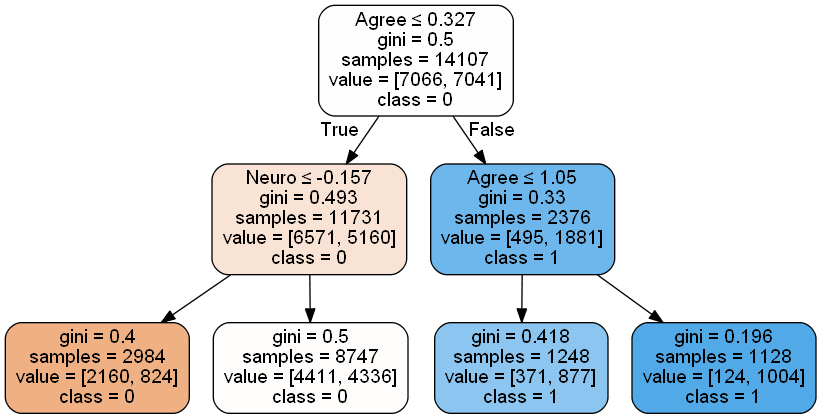

In [8]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('personalities.png')
Image(graph.create_png())


In [32]:
import pickle
with open ('data_26_07_w_corpus', 'rb') as fr:
    df = pickle.load(fr)
    

### BoW model for Low Agreeableness

In [34]:
low_agree = df[df['Agree'] < 0.432]

In [35]:
low_agree.head()

,reviewerID,asin,reviewText,overall,good,Comedy,Art House & International,Drama,Action & Adventure,Horror,...,Open_Science Fiction,Open_Animation,Consc_Comedy,Consc_Art House & International,Consc_Drama,Consc_Action & Adventure,Consc_Horror,Consc_Science Fiction,Consc_Animation,corpus
0,A19JYLHD94K94D,6304239327,Jan Svankajer's feature film follow up to his ...,5.0,1,0,1,1,0,0,...,0.0,0.0,-0.0,-0.244354,-0.244354,-0.0,-0.0,-0.0,-0.0,jan svankaj featur film follow masterpiec alic...
1,A144W50UYZG4YX,630339406X,Big-1988100mins/ColourTom HanksElizabeth Perki...,4.0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,big min colourtom hankselizabeth perkinsrobert...
2,A16QODENBJVUI1,B0007PALGG,Of all the films coming out this holiday movie...,4.0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.000000,0.084057,0.0,0.0,0.0,0.0,film come holiday movi season kinsey near top ...
3,A3L2856DIMUXJY,B0001DCR0C,"As noted by a number of reviewers, this starte...",4.0,1,0,1,1,0,0,...,0.0,0.0,0.0,0.466380,0.466380,0.0,0.0,0.0,0.0,note number review start life play director ma...
4,A1Z54EM24Y40LL,B00004WI5C,This is really a cute video. It's pretty long...,4.0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,realli cute video pretti long though may hard ...


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [37]:
cv = CountVectorizer(max_features = 500, ngram_range=(1,2))
XX = cv.fit_transform(low_agree["corpus"]).toarray()
# using relative word counts instead of absolute ones
tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(XX).toarray()

X = tfidf
y=low_agree["good"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

log = LogisticRegression(solver='liblinear')#regularization is applied by default
log.fit(X_train, y_train)
accuracy=log.score(X_test,y_test)
accuracy

0.8106494152774322

In [38]:
print('People with low agreeableness write a negative review',round(len(low_agree[low_agree.good == 0])/len(low_agree) * 100), '% of the time and a positive review', round(len(low_agree[low_agree.good == 1])/len(low_agree) * 100), '% of the time.')# 


People with low agreeableness write a negative review 55 % of the time and a positive review 45 % of the time.


### BoW model for High Agreeableness

In [39]:
#high agreebleness

high_agree = df[df['Agree'] > 0.432]

In [40]:
cv = CountVectorizer(max_features = 500, ngram_range=(1,2))
XX = cv.fit_transform(high_agree["corpus"]).toarray()
# using relative word counts instead of absolute ones
tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(XX).toarray()

X = tfidf
y=high_agree["good"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

log = LogisticRegression(solver='liblinear')#regularization is applied by default
log.fit(X_train, y_train)
accuracy=log.score(X_test,y_test)
accuracy

0.8538011695906432

In [41]:
print('People with high agreeableness write a negative review',round(len(high_agree[high_agree.good == 0])/len(high_agree) * 100), '% of the time and a positive review', round(len(high_agree[high_agree.good == 1])/len(high_agree) * 100), '% of the time.')# 


People with high agreeableness write a negative review 19 % of the time and a positive review 81 % of the time.


### BoW model for High Neuroticism

In [45]:
high_neuro = df[df['Neuro'] < -0.003]


In [46]:
cv = CountVectorizer(max_features = 500, ngram_range=(1,2))
XX = cv.fit_transform(high_neuro["corpus"]).toarray()
# using relative word counts instead of absolute ones
tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(XX).toarray()

X = tfidf
y=high_neuro["good"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

log = LogisticRegression(solver='liblinear')#regularization is applied by default
log.fit(X_train, y_train)
accuracy=log.score(X_test,y_test)
accuracy

0.8413197172034564

In [47]:
print('People with high neuroticism write a negative review',round(len(high_neuro[high_neuro.good == 0])/len(high_neuro) * 100), '% of the time and a positive review', round(len(high_neuro[high_neuro.good == 1])/len(high_neuro) * 100), '% of the time.')# 


People with high neuroticism write a negative review 68 % of the time and a positive review 32 % of the time.


### BoW model for Low Neuroticism

In [48]:
low_neuro = df[df['Neuro'] > -0.003]

cv = CountVectorizer(max_features = 500, ngram_range=(1,2))
XX = cv.fit_transform(low_neuro["corpus"]).toarray()
# using relative word counts instead of absolute ones
tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(XX).toarray()

X = tfidf
y=low_neuro["good"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

log = LogisticRegression(solver='liblinear')#regularization is applied by default
log.fit(X_train, y_train)
accuracy=log.score(X_test,y_test)
accuracy

0.817201166180758

In [49]:
print('People with low neuroticism write a negative review',round(len(low_neuro[low_neuro.good == 0])/len(low_neuro) * 100), '% of the time and a positive review', round(len(low_neuro[low_neuro.good == 1])/len(low_neuro) * 100), '% of the time.')# 


People with low neuroticism write a negative review 44 % of the time and a positive review 56 % of the time.


## Comparison of the Separate BoW models